In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return (x**2+y-11)**2 + (x+y**2-7)**2

def gradf (x,y):
    return np.array([(2*(-7 + x + y**2 + 2*x*(-11 + x**2 + y))), (2*(-11 + x**2 + y + 2*y*(-7 + x + y**2)) )])

def dx(x,y):
    return 2*(-7 + x + y**2 + 2*x*(-11 + x**2 + y))

def dy(x,y):
    return 2*(-11 + x**2 + y + 2*y*(-7 + x + y**2))  

dx: 2 (-7 + x + y^2 + 2 x (-11 + x^2 + y))

dy: 2 (-11 + x^2 + y + 2 y (-7 + x + y^2))

# ADAM

In [9]:
def adam(f, gradf, x0, y0, lr=0.01, lrf=10, k=0.1, km=0.9, kms=0.9, N=300):
    """Adam GD

    Args:
        f (_type_): function
        gradf (_type_): gradient of a fucntion
        x0 (_type_): start pos x
        y0 (_type_): start pos y
        lr (float, optional): learning rate. Defaults to 0.01.
        lrf (int, optional): learning rate fall off. Defaults to 10.
        k (float, optional): factor of decreasing learning rate . Defaults to 0.1.
        km (float, optional): factor of momentum. Defaults to 0.9.
        kms (float, optional): factor of momentum smoothing. Defaults to 0.9.
        N (int): Iterations count. Defaults to 100.
    """
    m = np.zeros(gradf(x0 ,y0).shape)
    gradSq = np.zeros((gradf(x0,y0)**2).shape)

    for i in range(N):
        if (i%lrf) == 0:
            lr*=k
        m=km*m-lr*(1-km)*gradf(x0,y0)
        gradSq=kms*gradSq+(1-kms)*gradf(x0,y0)**2

        n = (lr*gradf(x0,y0)*m)/(gradSq+10**(-6))**0.5

        x = x0-n[0]
        y = y0-n[1]
    return x,y, f(x,y)


In [10]:
#набор точек
z, y = datasets.make_blobs(n_samples=10, centers=2, n_features=2, random_state=0)
y = np.zeros(10)
x = np.zeros(10)
# Нам нужно сравнить размерности массивов
#y=np.reshape(y,x.shape)
for i in range(len(z)):
    x[i],y[i] = z[i];
x, y

(array([ 1.12031365, -0.49772229,  1.9263585 ,  2.49913075,  3.54934659,
         1.7373078 ,  2.91970372,  2.84382807,  0.87305123,  2.36833522]),
 array([5.75806083, 1.55128226, 4.15243012, 1.23133799, 0.6925054 ,
        4.42546234, 0.15549864, 3.32650945, 4.71438583, 0.04356792]))

In [11]:
adam(f,gradf,x,y,lr=0.1,lrf=50,km=0.8,kms=0.9)

(array([ 1.12031365, -0.49772229,  1.9263585 ,  2.49913075,  3.54934659,
         1.7373078 ,  2.91970372,  2.84382807,  0.87305123,  2.36833522]),
 array([5.75806083, 1.55128226, 4.15243012, 1.23133799, 0.6925054 ,
        4.42546234, 0.15549864, 3.32650945, 4.71438583, 0.04356792]),
 array([759.85203259, 110.57900416, 157.92436535,  21.31987261,
         14.07315326, 217.76765763,  21.83369908,  47.91238225,
        289.66911884,  50.0296433 ]))

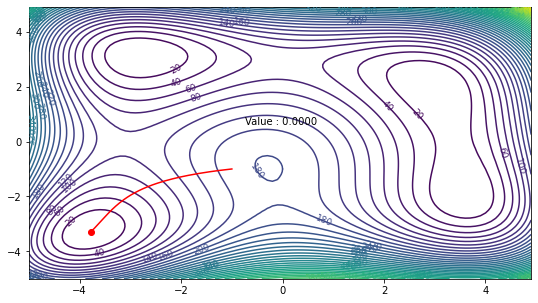

In [14]:
from matplotlib.ticker import MaxNLocator
import matplotlib.animation as animation

grid_points = 100
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(f(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

levelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())
levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())

x_est = -1
y_est = -1
r = 0.001

x_list = []
y_list = []

# Create figure
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(X, Y, Z, 50)
Epochs = 200
for i in range(Epochs):
    ax.clear()
    ax.clabel(cs, fontsize=9, inline=1)

    cs = ax.contour(X, Y, Z, 50)

    z_est = f(x_est, y_est)
    ax.scatter(x_est, y_est, c="r")
    x_list.append(x_est)
    y_list.append(y_est)
    ax.plot(x_list, y_list, c="r")
    ax.text(-0.75, 0.6, "Value : %.4f" % np.double(z_est))

    x_est, y_est = x_est - gradf(x_est, y_est)[0] * r, y_est - gradf(x_est, y_est)[1] * r
    
    #plt.savefig("step{0}".format(i), bbox_inches='tight')
    
plt.show()

In [16]:


from IPython.display import Image
Image(url='outAdam.gif')  